Department of Mathematics and Computer Science, Faculty of Science, Chulalongkorn University

2301694 Special Topics in Applied Mathematics (Deep Learning)

First Semester, Wednesday 28 September 2022, 15:00 - 18:00

In [ ]:
# Must run this statement first
!pip install --quiet mxnet

     |████████████████████████████████| 49.1 MB 1.8 MB/s 


**Instructions**

1. There are 5 questions in this exam.
2. Type in your Student ID and full name in the box below.
3. You must not distribute any part of this exam through any other persons. The exam is a government's property. Violators will be prosecuted under a criminal court.
4. Once the time is expired, student must stop typing .
5. Any student who does not obey the regulations listed above will receive punishment under the Faculty of Engineering Official Announcement on January 6, 2003 regarding the exam regulations.

** With implicit evidence or showing intention for cheating, student will receive an F in this course and will receive an academic suspension for 1 semester.**

**With explicit evidence for cheating, student will receive an F in this course and will receive an academic suspension for 1 year.**

I acknowledge all instructions above. This exam represents only my own work. I did not give or receive help on this exam.

Type in your name and date below.

### Type in your student ID and Name here
ID ....................
Name ..............................................

## 1. Deep Learning concept (10 points)
In classification, deep learning concept is different from the classical machine learning one such as artificial neural network. Identify the different between the new deep learning model and one of the traditional machine learning model such as naive bayes, logistic regression. Give an illustrative example to support your argument.

You need to explain the pipeline for training the standard machine learning model either naive bayes or logistic regression (3 points) and the pipeline for training the deep learning model (3 points). Then identify the difference between them (4 points).

## Solution 1.
One main concept of deep learning (DL) is ability of learning or extract features of data automatically, without any effort of practictioners. The ability is from the gradient-based style of learning algorihthm, such as gradient descent. However, the traditional machine learning models still require much effort in data preprocessing.

For example, if we consider naive bayes, the pipeline of this model starts from calculating probability from the given data and using law of probability to calculate the probability to be each labels.

In contrast, Deep learning require only transform the given data to numeric form in order to understandability of computer. We create a network to feed data forward and train the model via descent of gradient of parameters in the model iteratively.

The main difference of them is that we need to calculate some necessary stuff from data before using model to predict; however, DL can learn from data automatically.



## 2. Tensor (10 points)
Given tensors: $x_1$, $x_2$, $x_3$, $x_4$, $x_5$, $x_6$ and three constants $m$, $n$, and $k$. Find the expression that would generate the following results. You are not allowed to type any constant in your expression. You do not need to use the index for any expression.


In [2]:
import mxnet as mx
from mxnet import nd
m, n, k = 3, 5, 4
x_1, x_2, x_3 = nd.array([7.0]), nd.arange(m), nd.array([[3, -2, 0], [2, 1, 1]])
x_4, x_5, x_6 = nd.ones((n-m,n)), nd.array([3, -1, 1, -2, 0]), nd.ones_like(x_3)

In [3]:
# 2.1. The expression to generate 
#>> [[ 6. -4.  0.]
#    [ 4.  2.  2.]]
# is
x_3 * (m-n)


[[-6.  4. -0.]
 [-4. -2. -2.]]
<NDArray 2x3 @cpu(0)>

In [4]:
# 2.2. The expression to generate
#>> [[10.  5.  7.]
#    [ 9.  8.  8.]]
# is
x_3 + x_1


[[10.  5.  7.]
 [ 9.  8.  8.]]
<NDArray 2x3 @cpu(0)>

In [5]:
# 2.3. The expression to generate (Using .as_np_ndarray() to transform it to use with mx.np.matmul)
#>> array([[ 5.,  5.,  5.,  5.,  5.],
#          [-1., -1., -1., -1., -1.],
#          [ 1.,  1.,  1.,  1.,  1.]])
# is
nd.linalg_gemm2(x_3.T,x_4)


[[ 5.  5.  5.  5.  5.]
 [-1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.]]
<NDArray 3x5 @cpu(0)>

In [6]:
# 2.4. The expression to generate
#>> array([[[[ 0.],
#            [ 0.],
#            [ 0.],
#            [ 0.],
#            [ 0.]]],
#         [[[ 3.],
#           [-1.],
#           [ 1.],
#           [-2.],
#           [ 0.]]],
#         [[[ 6.],
#           [-2.],
#           [ 2.],
#           [-4.],
#           [ 0.]]]])
# is
nd.linalg_gemm2(x_2.reshape((k-m,m)).T,x_5.reshape((k-m,n))).reshape((m,k-m,n,k-m))


[[[[ 0.]
   [ 0.]
   [ 0.]
   [ 0.]
   [ 0.]]]


 [[[ 3.]
   [-1.]
   [ 1.]
   [-2.]
   [ 0.]]]


 [[[ 6.]
   [-2.]
   [ 2.]
   [-4.]
   [ 0.]]]]
<NDArray 3x1x5x1 @cpu(0)>

In [ ]:
# 2.5. The expression to generate 
#>> [[  5.   2.]
#    [-10.  -1.]
#    [ -4.  -1.]]
# is



[[  5.   2.]
 [-10.  -1.]
 [ -4.  -1.]]
<NDArray 3x2 @cpu(0)>

## 3. Naïve Bayes (10 points)

From the deep learning class, we construct the Naïve Bayes classifier for MNIST dataset from mxnet. Apply the same concept of the Naïve Bayes classifier to the Fashion-MNIST dataset which classifies the fashion  from mxnet to classify
types of fashion collections which are listed as
- 0 = T-shirt/top, 
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot.

Update the following Naïve Bayes code and apply it to test dataset of fashion collections.

In [7]:
# DO NOT CHANGE ANY CODE IN THIS BLOCK
from mxnet import nd, gluon
import numpy as np
import mxnet as mx
import matplotlib.pyplot as plt
def transform(data, label):
    return mx.nd.transpose(data.astype(np.float32), (2,0,1))/255, label.astype(np.float32)

train_data = gluon.data.DataLoader(gluon.data.vision.FashionMNIST(train=True, transform=transform), batch_size=128, shuffle=True)
test_data = gluon.data.DataLoader(gluon.data.vision.FashionMNIST(train=False, transform=transform), batch_size=128, shuffle=False)

In [8]:
# Get information for train_data and test_data
def countRecords(dataTable):
  num_records = 0
  all_labels = []
  for data, label in dataTable:
    for i in range(len(label)):
      num_records += 1
      all_labels.append(label[i].asscalar())
  return num_records, np.unique(all_labels)
print(countRecords(train_data))
print(countRecords(test_data))

(60000, array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32))
(10000, array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32))


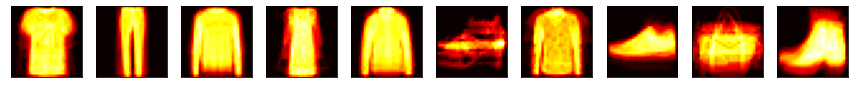

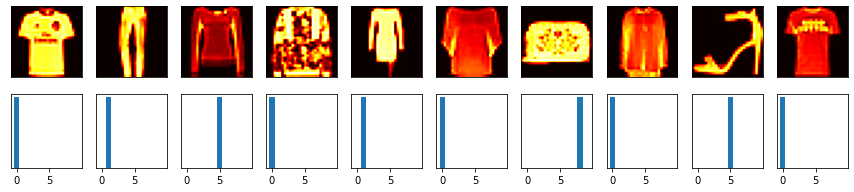

In [19]:
#### You will need to change this code from our lecture to work with FashionMNIST

##################
## Data section ##
##################
## Data loading code from 2301694
def transform(data, label):
    return mx.nd.transpose(data.astype(np.float32), (2,0,1))/255, label.astype(np.float32)
mnist_train = gluon.data.DataLoader(mx.gluon.data.vision.FashionMNIST(train=True, transform=transform), batch_size=128, shuffle=True)
mnist_test = gluon.data.DataLoader(mx.gluon.data.vision.FashionMNIST(train=False, transform=transform), batch_size=128, shuffle=False)

###################
## Model section ##
###################
# Initialize the count statistics for p(y) and p(x_i|y)
# Initialize all numbers with a count of 1 to ensure
# no zero division, call this Laplace smoothing.
ycount = nd.ones(shape=(10))
xcount = nd.ones(shape=(784, 10))
for data, label in mnist_train:
    for sample in range(len(label)):
        x = data[sample].reshape((784,))
        y = int(label[sample].asscalar())
        ycount[y] += 1
        xcount[:, y] += x
    break
for i in range(10):
    xcount[:, i] = xcount[:, i]/ycount[i]
py = ycount / nd.sum(ycount)

#####################
## Visualize model ##
#####################
fig, figarr = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    figarr[i].imshow(xcount[:, i].reshape((28, 28)).asnumpy(), cmap='hot')
    figarr[i].axes.get_xaxis().set_visible(False)
    figarr[i].axes.get_yaxis().set_visible(False)
plt.show()

######################
## Model evaluation ##
######################
logxcount, logxcountneg = nd.log(xcount), nd.log(1-xcount)
logpy = nd.log(py)
fig, figarr = plt.subplots(2, 10, figsize=(15, 3))
ctr = 0
for data, label in mnist_test:
    for sample in range(len(label)):
        x, y, logpx = data[sample].reshape((784,)), int(label[sample].asscalar()), logpy.copy()
        for i in range(10):
            logpx[i] += nd.dot(logxcount[:, i], x) + nd.dot(logxcountneg[:, i], 1-x)
        logpx -= nd.max(logpx)
        px = nd.exp(logpx).asnumpy()
        px /= np.sum(px)
        figarr[1, ctr].bar(range(10), px)
        figarr[1, ctr].axes.get_yaxis().set_visible(False)
        figarr[0, ctr].imshow(x.reshape((28, 28)).asnumpy(), cmap='hot')
        figarr[0, ctr].axes.get_xaxis().set_visible(False)
        figarr[0, ctr].axes.get_yaxis().set_visible(False)
        ctr += 1
        if ctr == 10:
            break
    break
plt.show()

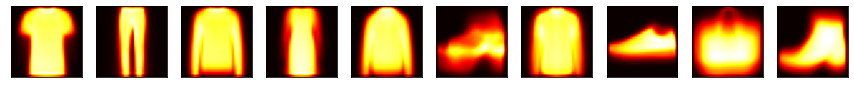


[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
<NDArray 10 @cpu(0)>


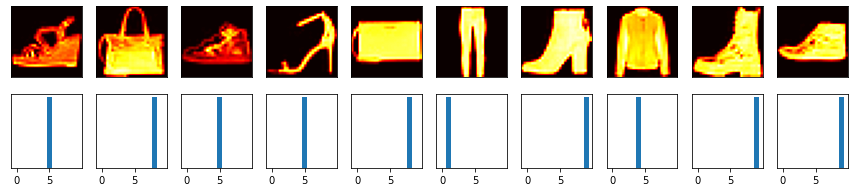

## 4. Multiple Regression

Consider the Forest Fires Data Set from UCI repository which is supplied by Paulo Cortez and Anibal Morais from the department of information systems, University of Minho, Portugal in 2008. It contains 13 attributes:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

The target is the $13^{th}$ attribute. This attribute is very skewed towards 0.0, thus you will need to transform it using the logarithm transformation.

There is no missing values.

You must implement the multiple regression using SGD from our class.
- The total 10 points will give to a student who can find the parameters of this regression and achieve 0.001 for the average square loss.
- The total 8 points will give to a student who can find the parameters of this regression and achieve 0.01 for the average square loss.
- The total 6 points will give to a student who can find the parameters of this regression and achieve 0.1 for the average square loss.
- The total 5 points will give to a student who can make this code work with this dataset.


In [20]:
# First you must get the data from the internet
!python -m wget https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv


Saved under forestfires.csv


In [21]:
# We will need to process this text dataset using pandas
# Keeping only continuous variables and scale each column to be in [0, 1]

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
filename = "forestfires.csv"
df = pd.read_csv(filename, header="infer")

print(df.shape)

# Drop string attributes
df = df.drop(['month', 'day'], axis=1)

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)
df.loc[:,:] = scaled_values

# Dropping 'month' and 'day'
# Convert the target using log(x+1)
num_inputs, num_outputs = 10, 1
X = mx.nd.array(df.drop(['area'], axis=1))
y = mx.nd.array(np.log(df['area']+1))
num_examples = len(y)
print(num_examples)

(517, 13)
517


In [23]:
## Update this code to build the multiple regression the last epoch must have average square loss less than 0.001

# Build multiple regression from ground-up
import mxnet as mx
from mxnet import nd, autograd, gluon
mx.random.seed(1)
data_ctx, model_ctx = mx.cpu(), mx.cpu()
batch_size = 16
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y), batch_size=batch_size, shuffle=True)

w = nd.random_normal(shape=(num_inputs, num_outputs), ctx=model_ctx)
b = nd.random_normal(shape=num_outputs, ctx=model_ctx)
params = [w, b]
for param in params:
    param.attach_grad()
def net(X):
    return mx.nd.dot(X, w) + b
def square_loss(yhat, y): 
    return nd.mean((yhat - y) ** 2)
def SGD(params, lr):    
    for param in params:
        param[:] = param - lr * param.grad

epochs, learning_rate = 1500, 0.01
num_batches = num_examples/batch_size
print(w,b)
for e in range(epochs):
    cumulative_loss = 0.0
    # inner loop
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx).reshape((-1, 1))
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        cumulative_loss += loss.asscalar()
    if e%10==0:
      print("The cumulative loss of epoch %3d is %10.8f"%(e, cumulative_loss / num_batches))


[[ 0.03629482]
 [-0.49024424]
 [-0.9501793 ]
 [ 0.03751943]
 [-0.7298465 ]
 [-2.0401056 ]
 [ 1.4821309 ]
 [ 1.040828  ]
 [-0.45256865]
 [ 0.3116043 ]]
<NDArray 10x1 @cpu(0)> 
[-0.8367378]
<NDArray 1 @cpu(0)>
The cumulative loss of epoch   0 is 0.74365979
The cumulative loss of epoch  10 is 0.06826014
The cumulative loss of epoch  20 is 0.05900614
The cumulative loss of epoch  30 is 0.05024403
The cumulative loss of epoch  40 is 0.04535937
The cumulative loss of epoch  50 is 0.03926848
The cumulative loss of epoch  60 is 0.03477193
The cumulative loss of epoch  70 is 0.03195498
The cumulative loss of epoch  80 is 0.03015951
The cumulative loss of epoch  90 is 0.02662260
The cumulative loss of epoch 100 is 0.02404679
The cumulative loss of epoch 110 is 0.02185533
The cumulative loss of epoch 120 is 0.02024296
The cumulative loss of epoch 130 is 0.01860312
The cumulative loss of epoch 140 is 0.01725552
The cumulative loss of epoch 150 is 0.01601322
The cumulative loss of epoch 160 is 0.0


[[-0.6776515 ]
 [ 0.10073948]
 [ 0.5759544 ]
 [-0.3469252 ]
 [-0.22134334]
 [-1.804719  ]
 [-0.8064291 ]
 [ 1.220331  ]
 [ 2.2323563 ]
 [ 0.2007023 ]]
<NDArray 10x1 @cpu(0)> 
[-0.5496865]
<NDArray 1 @cpu(0)>
Epoch   0: The cumulative loss is 0.42767163
Epoch 200: The cumulative loss is 0.00409143
Epoch 400: The cumulative loss is 0.00271189
Epoch 600: The cumulative loss is 0.00227499
Epoch 800: The cumulative loss is 0.00209653
Epoch 1000: The cumulative loss is 0.00199846
Epoch 1200: The cumulative loss is 0.00194707
Epoch 1400: The cumulative loss is 0.00194011
Epoch 1600: The cumulative loss is 0.00192551
Epoch 1800: The cumulative loss is 0.00195348


## 5. Multilayer perceptron (10 points)

Design the multilayer percentron (MLP) to learn the Wisconsin breast cancer data from scikit-learn module. It composes of 30 attributes:'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'. The target variable is a binary class for Benign and Malignant. 

You can use mxnet.gluon from our class.
- The total 10 points will give to a student who can find the parameters of this perceptron achieving more than 95% testing accuracy.
- The total 8 points will give to a student who can find the parameters of this perceptron achieving more than 90% testing accuracy.
- The total 6 points will give to a student who can find the parameters of this perceptron achieving more than 80% testing accuracy.
- The total 5 points will give to a student who can make this code work with this dataset.



In [24]:
# DO NOT CHANGE THIS BLOCK
# Import Dataset from scikit-learn
from sklearn import datasets, model_selection
data_set = datasets.load_breast_cancer()
X = data_set.data
Y = data_set.target
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)
print(len(Xtrain), len(Xtest))

426 143


In [25]:
# Update this MLP with one hidden layer having 5 hidden nodes to a multi-layer perceptron
from mxnet import nd, np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mxnet import gluon, autograd
from mxnet.gluon import loss, nn

X, Y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, stratify=Y, random_state=123)
X_train, X_test, Y_train, Y_test = np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)
samples, features = X_train.shape
classes = np.unique(np.array(Y))

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

#Nomalizing
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std


class MLP(nn.Block):
  def __init__(self, **kwargs):
    super(MLP, self).__init__(**kwargs)
    self.linear1 = nn.Dense(5, activation="relu")
    self.linear4 = nn.Dense(1, activation="sigmoid")

  def forward(self, x):
    x = self.linear1(x)

    return self.linear4(x)

epochs = 1000
learning_rate = 0.001

data_ctx = mx.cpu()
model_ctx = mx.cpu()

model = MLP()
model.collect_params().initialize(mx.init.Normal(sigma=.01), ctx=model_ctx)
net(data.as_in_context(data_ctx))
loss_func = loss.SigmoidBCELoss(from_sigmoid=True)
trainer = gluon.Trainer(model.collect_params(), "adam", {"learning_rate":learning_rate})

for epoch in range(1, epochs+1):
  with autograd.record():
    preds = model(X_train.as_nd_ndarray().astype("float32"))
    loss_val = loss_func(preds, Y_train.as_nd_ndarray().astype("float32"))

  loss_val.backward()
  loss_val = loss_val.mean().asscalar()

  trainer.step(len(X_train))
  print("BCE : {:.3f}".format(loss_val))

train_preds = model(X_train.as_nd_ndarray().astype("float32"))
train_preds = (train_preds > 0.5).astype("float32")
test_preds = model(X_test.as_nd_ndarray().astype("float32"))
test_preds = (test_preds > 0.5).astype("float32")

from sklearn.metrics import accuracy_score
print("Train Accuracy : {:.2f}".format(accuracy_score(Y_train.asnumpy(), train_preds.squeeze().asnumpy())))
print("Test Accuracy : {:.2f}".format(accuracy_score(Y_test.asnumpy(), test_preds.squeeze().asnumpy())))

BCE : 0.693
BCE : 0.693
BCE : 0.693
BCE : 0.692
BCE : 0.692
BCE : 0.692
BCE : 0.691
BCE : 0.691
BCE : 0.691
BCE : 0.690
BCE : 0.690
BCE : 0.689
BCE : 0.689
BCE : 0.688
BCE : 0.687
BCE : 0.687
BCE : 0.686
BCE : 0.685
BCE : 0.684
BCE : 0.684
BCE : 0.683
BCE : 0.682
BCE : 0.681
BCE : 0.679
BCE : 0.678
BCE : 0.677
BCE : 0.676
BCE : 0.674
BCE : 0.673
BCE : 0.672
BCE : 0.670
BCE : 0.668
BCE : 0.667
BCE : 0.665
BCE : 0.663
BCE : 0.661
BCE : 0.660
BCE : 0.658
BCE : 0.656
BCE : 0.653
BCE : 0.651
BCE : 0.649
BCE : 0.647
BCE : 0.644
BCE : 0.642
BCE : 0.640
BCE : 0.637
BCE : 0.634
BCE : 0.632
BCE : 0.629
BCE : 0.626
BCE : 0.624
BCE : 0.621
BCE : 0.618
BCE : 0.615
BCE : 0.612
BCE : 0.609
BCE : 0.606
BCE : 0.602
BCE : 0.599
BCE : 0.596
BCE : 0.593
BCE : 0.589
BCE : 0.586
BCE : 0.583
BCE : 0.579
BCE : 0.576
BCE : 0.572
BCE : 0.569
BCE : 0.565
BCE : 0.562
BCE : 0.558
BCE : 0.555
BCE : 0.551
BCE : 0.547
BCE : 0.544
BCE : 0.540
BCE : 0.536
BCE : 0.533
BCE : 0.529
BCE : 0.525
BCE : 0.522
BCE : 0.518
BCE 

In [26]:
train_preds = model(X_train.as_nd_ndarray().astype("float32"))
train_preds = (train_preds > 0.5).astype("float32")
test_preds = model(X_test.as_nd_ndarray().astype("float32"))
test_preds = (test_preds > 0.5).astype("float32")

from sklearn.metrics import accuracy_score
print("Train Accuracy : {:.2f}".format(accuracy_score(Y_train.asnumpy(), train_preds.squeeze().asnumpy())))
print("Test Accuracy : {:.2f}".format(accuracy_score(Y_test.asnumpy(), test_preds.squeeze().asnumpy())))


Train Accuracy : 0.98
Test Accuracy : 0.98


Train Accuracy : 0.99
Test Accuracy : 0.97
